## Todos los pasos de una sola Tirada (Red Neuronal)

### Preparar los datos

In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

import numpy as np
import matplotlib.pyplot as plt

#Versión de TensorFlow que se ocupa.
print(tf.__version__)

2.5.0


In [ ]:
#Cargar los datos
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [ ]:
#Escalar los valores de entrada al rango [0,1]
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
#Comprobación de la forma de los datos
print("train_images.shape:", train_images.shape)
print("len(train_labels):", len(train_labels))
print()
print("test_images.shape:", test_images.shape)
print("len(test_labels):", len(test_labels))

train_images.shape: (60000, 28, 28)
len(train_labels): 60000

test_images.shape: (10000, 28, 28)
len(test_labels): 10000


In [ ]:
#Etiquetas en el set de training
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

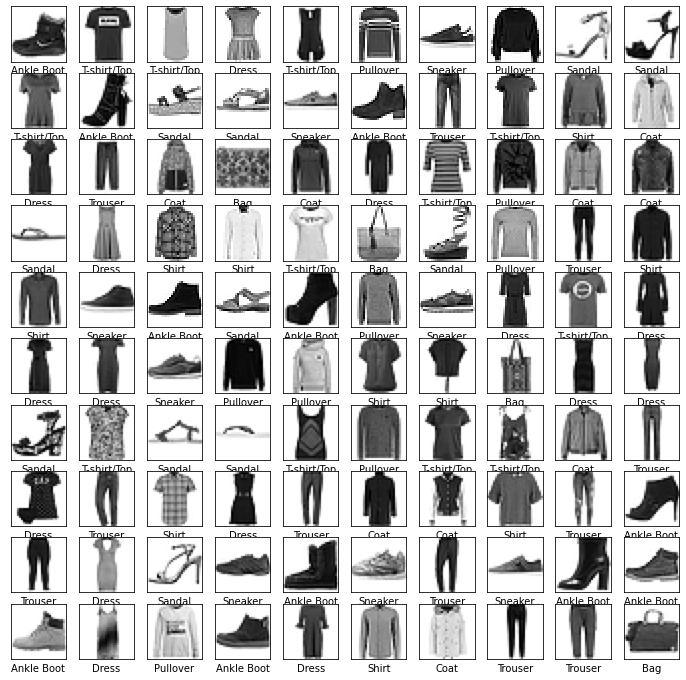

In [ ]:
#Visualización de las 50 primeras imágenes
plt.figure(figsize=(12,12))
for i in range(100):
  plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## Entrenamiento del modelo

In [ ]:
#Definir el modelo
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
#Resumen
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Configurar el modelo
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
#Entrenamiento del modelo
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 1ms/step - loss: 2.0166 - accuracy: 0.3045
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3405 - accuracy: 0.6192
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0907 - accuracy: 0.6987
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9395 - accuracy: 0.7309
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8374 - accuracy: 0.7454


In [ ]:
#Evaluación y mejora del modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print()
print('Testeo de Precisión:', round(test_acc*100),3)

313/313 [==============================] - 0s 1ms/step - loss: 0.7926 - accuracy: 0.7493

Testeo de Precisión: 75 3


## Uso del modelo para hacer predicciones

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[5]

array([0.02973528, 0.81039214, 0.00644581, 0.10751997, 0.00805775,
       0.00418717, 0.02185904, 0.00572372, 0.00154998, 0.00452906],
      dtype=float32)

In [ ]:
np.argmax(predictions[5])

1

In [ ]:
test_labels[5]

1

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

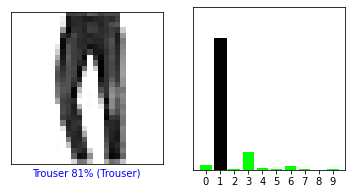

In [ ]:
#Predicción del modelo para la imagen 5
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

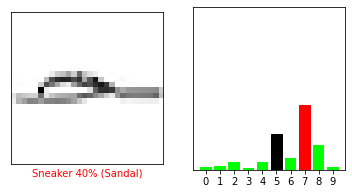

In [ ]:
#Predicción del modelo para la imagen 8
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

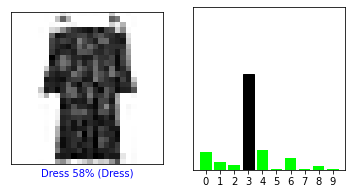

In [ ]:
#Predicción del modelo para la imagen 33
i = 33
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

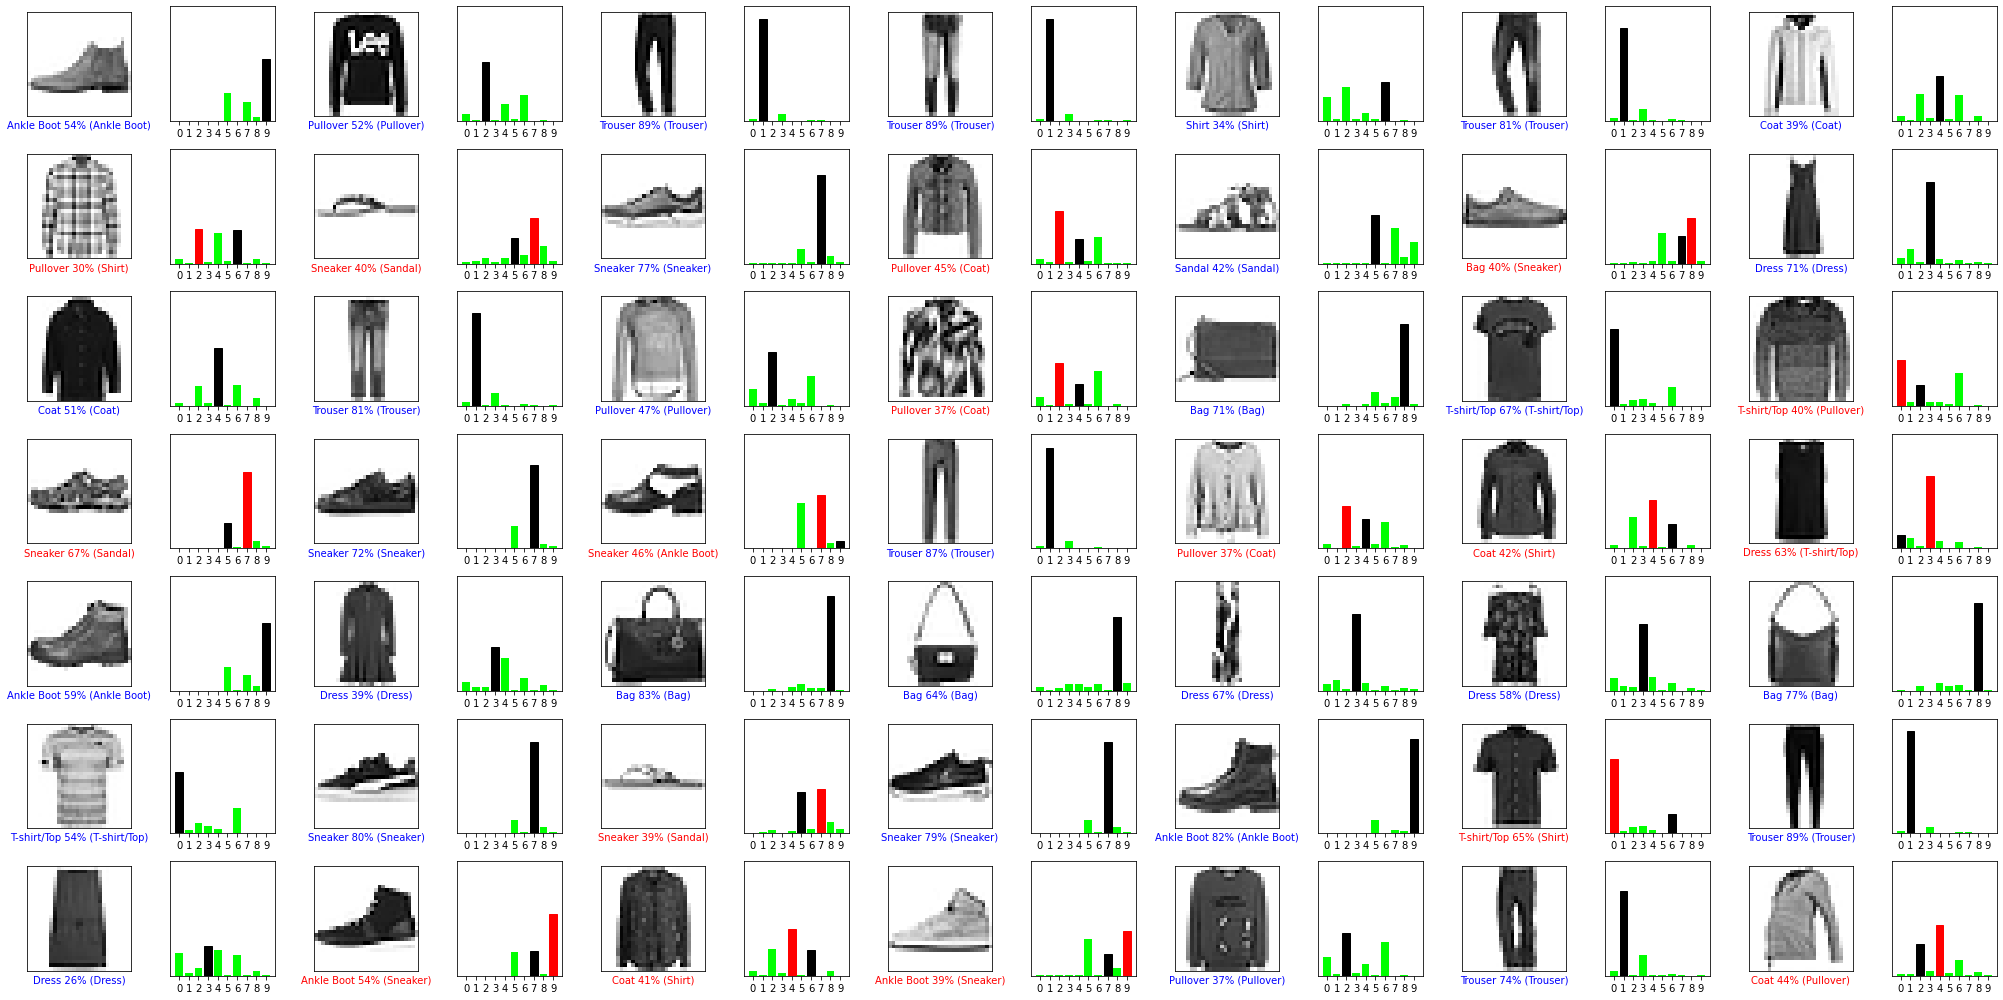

In [ ]:
num_rows = 7
num_cols = 7
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Cambiar el Optimatizador y mejorar el modelo

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3993 - accuracy: 0.6056
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5893 - accuracy: 0.8175
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4739 - accuracy: 0.8426
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4414 - accuracy: 0.8475
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.4510 - accuracy: 0.8411

Test accuracy: 0.8410999774932861
